# AI Wales - Poll Results

Initial Analysis of the data collected during the first AI Wales meeting. The data was collected by participants placing a blue star next to a subject or topic they had interest in learning more about. The data is a little messy - not all subjects had a star and and there were two sheets that were completed. The raw data is in CSV format and formatted like many spreadheets. Here we use Pandas to tidy up the data and delve into the results.

In [16]:
import pandas as pd
#This allows us to view the plots in notebook
%matplotlib inline

### Import Data
Lets use Pandas to inport the CSV file and lets have a look at the first 5 rows of data:

In [34]:
learn_df = pd.read_csv('AIWalesPollLearn.csv')
learn_df.head()

,Subject,Group,Sheet1,Sheet2
0,Ethics,Eithics,2.0,1.0
1,Data Science,DS,2.0,2.0
2,Data Storage,DS,4.0,NaN
3,Data Viz,DS,2.0,NaN
4,Data Analytics,DS,6.0,3.0


#### The Data is split between the two sheets and we also have some blank or NaN entries.
So we need to replace the NaN with 0, and then add each column to get a total. 

In [35]:
learn_df.fillna(0, inplace=True)
learn_df['Total'] = learn_df['Sheet1']+ learn_df['Sheet2']
learn_df.head()

,Subject,Group,Sheet1,Sheet2,Total
0,Ethics,Eithics,2.0,1.0,3.0
1,Data Science,DS,2.0,2.0,4.0
2,Data Storage,DS,4.0,0.0,4.0
3,Data Viz,DS,2.0,0.0,2.0
4,Data Analytics,DS,6.0,3.0,9.0


Lets just get a high level summary - how many votes were cast? and over how many subjects?

In [42]:
print("There were %d votes cast across %d subjects" % (learn_df['Total'].sum(), learn_df['Subject'].count()))

There were 89 votes cast across 24 subjects


#### Now we want to view the total votes per group, so we can just aggregate using the groupby function.

In [46]:
learn_grp = learn_df.groupby(['Group']).aggregate(sum)
learn_grp.head()
print('There are %d Topic Groups' % len(learn_grp))

There are 11 Topic Groups


And finally we can plot - we can simply use the built in pandas function for this

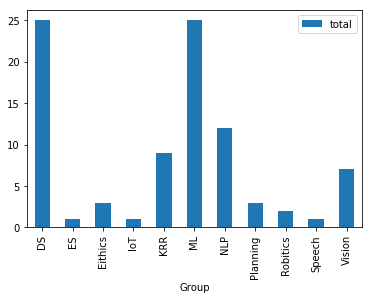

In [23]:
plt = learn_grp.plot.bar( y='total')
plt

We can see that we have 2 clear favourites - Data Science and Machine Learning (you all must love maths). Lets dig a little deeper into these.

In [32]:
fav = ['DS', 'ML']
learn_filtered = learn_df.loc[learn_df['Group'].isin(fav)]
learn_filtered.head()

,Subject,Group,Sheet1,Sheet2,Total
1,Data Science,DS,2.0,2.0,4.0
2,Data Storage,DS,4.0,0.0,4.0
3,Data Viz,DS,2.0,0.0,2.0
4,Data Analytics,DS,6.0,3.0,9.0
5,Data Mining,DS,3.0,3.0,6.0


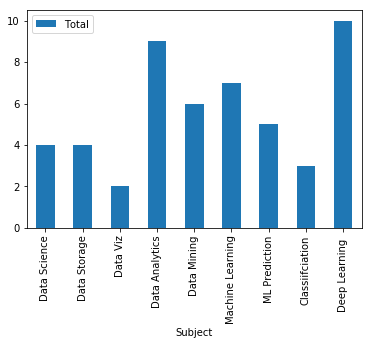

In [33]:
learn_filtered.plot.bar(x='Subject', y = 'Total')

### The key interest areas are in Data Analytics and Deep Learning. However to get to Deep Learning we need a good grasp of ML in general!